In [1]:
import torch

In [2]:
A = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
])

In [3]:
A

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [4]:
X = torch.tensor([
    [1.0, 4.0, 7.0],
     [2.0, 3.0, 6.0]
], dtype=torch.bfloat16)

In [5]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [6]:
X.shape

torch.Size([2, 3])

In [7]:
X.dtype

torch.bfloat16

In [8]:
X[0, 1]

tensor(4., dtype=torch.bfloat16)

In [9]:
X[:, 1]

tensor([4., 3.], dtype=torch.bfloat16)

In [10]:
X.abs()

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [11]:
torch.abs(X)

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [12]:
# torch.cos(), torch.exp(), torch.max(), torch.mean(), torch.sqrt()

In [13]:
X.sqrt()

tensor([[1.0000, 2.0000, 2.6406],
        [1.4141, 1.7344, 2.4531]], dtype=torch.bfloat16)

In [14]:
10 * (X + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]], dtype=torch.bfloat16)

In [15]:
X.exp()

tensor([[   2.7188,   54.5000, 1096.0000],
        [   7.3750,   20.1250,  404.0000]], dtype=torch.bfloat16)

In [16]:
X.mean()

tensor(3.8281, dtype=torch.bfloat16)

In [17]:
X.max(dim=0) #, keepdim=True

torch.return_types.max(
values=tensor([2., 4., 7.], dtype=torch.bfloat16),
indices=tensor([1, 0, 0]))

In [18]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [19]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]], dtype=torch.bfloat16)

In [20]:
import numpy as np

In [21]:
A.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [22]:
torch.tensor(np.array([[1., 4., 7.],
                      [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [23]:
# It’s generally better to use 32 bits in deep learning because this takes half the RAM and speeds up computations,
# and neural nets do not actually need the extra precision offered by 64-bit floats.

In [24]:
N = torch.FloatTensor(np.array([            # automatically converts the array to 32 bits
                            [1., 4., 7.],
                            [2., 3., 6 ]
                              ]))
N

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [25]:
N.dtype

torch.float32

In [26]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [27]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [28]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [29]:
X.relu_()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [30]:
X    # _ changed in place

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [31]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [32]:
device

'cuda'

In [33]:
!nvidia-smi   # watch -n 1 nvidia-smi

Sat Feb  7 14:33:13 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
M = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
])
M = M.to(device)

In [35]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [36]:
M.device

device(type='cuda', index=0)

In [37]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [38]:
R = M @ M.T

In [39]:
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [40]:
M = torch.rand((1000, 1000))  # on the CPU
%timeit M @ M.T


M = torch.rand((1000, 1000), device="cuda")  # on the GPU
%timeit M @ M.T

# now try 100 by 100 :D

37.6 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
538 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [42]:
f.backward()
x.grad

tensor(10.)

In [43]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [44]:
x

tensor(4., requires_grad=True)

In [45]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad   # detach yaddashda eyni yerdedi

In [46]:
x_detached

tensor(3.)

In [47]:
x.grad.zero_()

tensor(0.)

In [48]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    print(x)
    # print(x.grad)
    x.grad.zero_()  # reset the gradients

tensor(4., requires_grad=True)
tensor(3.2000, requires_grad=True)
tensor(2.5600, requires_grad=True)
tensor(2.0480, requires_grad=True)
tensor(1.6384, requires_grad=True)
tensor(1.3107, requires_grad=True)
tensor(1.0486, requires_grad=True)
tensor(0.8389, requires_grad=True)
tensor(0.6711, requires_grad=True)
tensor(0.5369, requires_grad=True)
tensor(0.4295, requires_grad=True)
tensor(0.3436, requires_grad=True)
tensor(0.2749, requires_grad=True)
tensor(0.2199, requires_grad=True)
tensor(0.1759, requires_grad=True)
tensor(0.1407, requires_grad=True)
tensor(0.1126, requires_grad=True)
tensor(0.0901, requires_grad=True)
tensor(0.0721, requires_grad=True)
tensor(0.0576, requires_grad=True)
tensor(0.0461, requires_grad=True)
tensor(0.0369, requires_grad=True)
tensor(0.0295, requires_grad=True)
tensor(0.0236, requires_grad=True)
tensor(0.0189, requires_grad=True)
tensor(0.0151, requires_grad=True)
tensor(0.0121, requires_grad=True)
tensor(0.0097, requires_grad=True)
tensor(0.0077, requires_

In [50]:
# t = torch.tensor(2.0, requires_grad=True)
# z = t.exp()  # this is an intermediate result
# z += 1  # this is an in-place operation
# z.backward()  #  RuntimeError!

In [51]:
# but

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z = z + 1  # new tensor created, and previous saved for computation graph
z.backward()

# make sure you don’t modify in place a tensor needed for backprop

In [52]:
import sklearn

In [53]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [54]:
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [55]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_full, y_train_full, test_size=0.2)

In [56]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [57]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

In [58]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)


In [59]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [60]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
  y_pred = X_train @ w + b
  loss = ((y_pred - y_train) ** 2).mean()
  loss.backward()
  with torch.no_grad():
    b -= learning_rate * b.grad
    w -= learning_rate * w.grad
    b.grad.zero_()
    w.grad.zero_()
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')



Epoch 1/20, Loss: 16.08735466003418
Epoch 2/20, Loss: 4.759960174560547
Epoch 3/20, Loss: 2.165912628173828
Epoch 4/20, Loss: 1.2788596153259277
Epoch 5/20, Loss: 0.9425214529037476
Epoch 6/20, Loss: 0.8041090369224548
Epoch 7/20, Loss: 0.7397555708885193
Epoch 8/20, Loss: 0.7043110728263855
Epoch 9/20, Loss: 0.6809490919113159
Epoch 10/20, Loss: 0.6632488965988159
Epoch 11/20, Loss: 0.6486709117889404
Epoch 12/20, Loss: 0.6361439228057861
Epoch 13/20, Loss: 0.6251630783081055
Epoch 14/20, Loss: 0.6154493093490601
Epoch 15/20, Loss: 0.6068193316459656
Epoch 16/20, Loss: 0.5991352796554565
Epoch 17/20, Loss: 0.592284619808197
Epoch 18/20, Loss: 0.5861711502075195
Epoch 19/20, Loss: 0.5807113647460938
Epoch 20/20, Loss: 0.5758317708969116


In [61]:
X_new = X_test[:3]
with torch.no_grad():
  y_pred = X_new @ w + b

y_pred

tensor([[0.9667],
        [1.8739],
        [1.6846]])

In [62]:
y_test[:3]

tensor([[0.7730],
        [1.5890],
        [0.6530]])

In [63]:
import torch.nn as nn

In [64]:
torch.manual_seed(42)
model = nn.Linear(in_features = n_features, out_features=1)

In [65]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [66]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [67]:
model.parameters()

<generator object Module.parameters at 0x7e0fa7407ca0>

In [68]:
next(model.parameters())

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [69]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [70]:
for name, param in model.named_parameters():
  print(f'{name} | {param}')

weight | Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
bias | Parameter containing:
tensor([0.3117], requires_grad=True)


In [71]:
model(X_train[:2])

tensor([[0.5525],
        [0.8646]], grad_fn=<AddmmBackward0>)

In [72]:
y_train[:2]

tensor([[5.0000],
        [1.7380]])

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [74]:
model(X_train[:2])

tensor([[0.5525],
        [0.8646]], grad_fn=<AddmmBackward0>)

In [75]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

In [76]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.310641765594482
Epoch 2/20, Loss: 0.7844113111495972
Epoch 3/20, Loss: 0.6300842761993408
Epoch 4/20, Loss: 0.6113409399986267
Epoch 5/20, Loss: 0.6013480424880981
Epoch 6/20, Loss: 0.5933651924133301
Epoch 7/20, Loss: 0.5865233540534973
Epoch 8/20, Loss: 0.5805335640907288
Epoch 9/20, Loss: 0.5752464532852173
Epoch 10/20, Loss: 0.5705631971359253
Epoch 11/20, Loss: 0.5664077401161194
Epoch 12/20, Loss: 0.5627169609069824
Epoch 13/20, Loss: 0.5594363808631897
Epoch 14/20, Loss: 0.5565187335014343
Epoch 15/20, Loss: 0.553922176361084
Epoch 16/20, Loss: 0.5516100525856018
Epoch 17/20, Loss: 0.54954993724823
Epoch 18/20, Loss: 0.5477132797241211
Epoch 19/20, Loss: 0.5460748672485352
Epoch 20/20, Loss: 0.5446123480796814


In [77]:
X_new = X_test[:3]

with torch.no_grad():
  y_pred = model(X_new)

y_pred

tensor([[0.7564],
        [1.7175],
        [1.5699]])

In [78]:
y_test[:3]

tensor([[0.7730],
        [1.5890],
        [0.6530]])

In [79]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features,50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [80]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.031091690063477
Epoch 2/20, Loss: 2.105064630508423
Epoch 3/20, Loss: 1.0399540662765503
Epoch 4/20, Loss: 0.8893072605133057
Epoch 5/20, Loss: 0.8037974238395691
Epoch 6/20, Loss: 0.7507634162902832
Epoch 7/20, Loss: 0.7167937755584717
Epoch 8/20, Loss: 0.6942470669746399
Epoch 9/20, Loss: 0.678571879863739
Epoch 10/20, Loss: 0.6669562458992004
Epoch 11/20, Loss: 0.6576224565505981
Epoch 12/20, Loss: 0.6496568322181702
Epoch 13/20, Loss: 0.642588198184967
Epoch 14/20, Loss: 0.6361218094825745
Epoch 15/20, Loss: 0.6300556063652039
Epoch 16/20, Loss: 0.6243150234222412
Epoch 17/20, Loss: 0.618839681148529
Epoch 18/20, Loss: 0.613573431968689
Epoch 19/20, Loss: 0.608498215675354
Epoch 20/20, Loss: 0.6035992503166199


# Making it MiniBatches

In [81]:
from torch.utils.data import TensorDataset, DataLoader

In [82]:
train_dataset = TensorDataset(X_train, y_train)

In [83]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [84]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features = n_features, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(in_features = 32, out_features = 1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [85]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [86]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  model.train()
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [87]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:0.6995
Epoch 2/20, Loss:0.5169
Epoch 3/20, Loss:0.4229
Epoch 4/20, Loss:0.3985
Epoch 5/20, Loss:0.3860
Epoch 6/20, Loss:0.3797
Epoch 7/20, Loss:0.3704
Epoch 8/20, Loss:0.3621
Epoch 9/20, Loss:0.3580
Epoch 10/20, Loss:0.3498
Epoch 11/20, Loss:0.3448
Epoch 12/20, Loss:0.3422
Epoch 13/20, Loss:0.3407
Epoch 14/20, Loss:0.3368
Epoch 15/20, Loss:0.3317
Epoch 16/20, Loss:0.3256
Epoch 17/20, Loss:0.3240
Epoch 18/20, Loss:0.3198
Epoch 19/20, Loss:0.3180
Epoch 20/20, Loss:0.3156


In [88]:
import torch
print(torch.cuda.is_available())


True


In [89]:
# LET'S EVALUATE our model

def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
  model.eval()
  metrics=[]
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric = metric_fn(y_pred, y_batch)
      metrics.append(metric)
  return aggregate_fn(torch.stack(metrics))


In [90]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.3111, device='cuda:0')

In [91]:
def rmse(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean().sqrt()

In [92]:
evaluate(model, valid_loader, rmse)


tensor(0.5438, device='cuda:0')

In [93]:
0.3149 ** 0.5 != 0.5497

True

The reason is that instead of calculating the RMSE over the whole validation set, we computed it over each batch and then computed the mean of all these batch RMSEs

In [94]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5578, device='cuda:0')

In [95]:
0.3149 ** 0.5

0.561159513863928

In [96]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.2 MB/s eta 0:00:00


In [97]:
import torchmetrics

In [98]:
def evaluate_tm(model, data_loader, metric):
  model.eval()
  metric.reset()
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric.update(y_pred, y_batch)
  return metric.compute()

In [99]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5557, device='cuda:0')

# Deep and Wide Networks

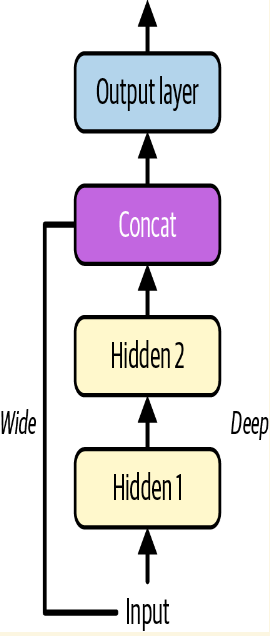

In [100]:
class WideAndDeep(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(n_features, 50),
        nn.ReLU(),
        nn.Linear(50, 40),
        nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + n_features, 1)

  def forward(self, X):
    deep_output = self.deep_stack(X)
    wide_and_deep = torch.concat([X, deep_output], dim=1)
    return self.output_layer(wide_and_deep)

In [101]:
[i for i in WideAndDeep(8).children()]

[Sequential(
   (0): Linear(in_features=8, out_features=50, bias=True)
   (1): ReLU()
   (2): Linear(in_features=50, out_features=40, bias=True)
   (3): ReLU()
 ),
 Linear(in_features=48, out_features=1, bias=True)]

In [102]:
[i for i in WideAndDeep(8).named_children()]

[('deep_stack',
  Sequential(
    (0): Linear(in_features=8, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )),
 ('output_layer', Linear(in_features=48, out_features=1, bias=True))]

In [103]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3617
Epoch 2/20, Loss:0.6303
Epoch 3/20, Loss:0.6067
Epoch 4/20, Loss:0.5773
Epoch 5/20, Loss:0.5772
Epoch 6/20, Loss:0.5491
Epoch 7/20, Loss:0.5466
Epoch 8/20, Loss:0.5332
Epoch 9/20, Loss:0.5576
Epoch 10/20, Loss:0.5209
Epoch 11/20, Loss:0.5103
Epoch 12/20, Loss:0.4828
Epoch 13/20, Loss:0.4764
Epoch 14/20, Loss:0.4661
Epoch 15/20, Loss:0.4614
Epoch 16/20, Loss:0.4527
Epoch 17/20, Loss:0.4492
Epoch 18/20, Loss:0.4392
Epoch 19/20, Loss:0.4337
Epoch 20/20, Loss:0.4291


In [104]:
class WideAndDeepV2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide


  def forward(self, X):
    X_wide = X[:, :5]
    X_deep = X[:, 2:]

    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)


In [105]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.4489
Epoch 2/20, Loss:0.6250
Epoch 3/20, Loss:0.5748
Epoch 4/20, Loss:0.5470
Epoch 5/20, Loss:0.5260
Epoch 6/20, Loss:0.5121
Epoch 7/20, Loss:0.5031
Epoch 8/20, Loss:0.4994
Epoch 9/20, Loss:0.4879
Epoch 10/20, Loss:0.4806
Epoch 11/20, Loss:0.4742
Epoch 12/20, Loss:0.4706
Epoch 13/20, Loss:0.4651
Epoch 14/20, Loss:0.4616
Epoch 15/20, Loss:0.4575
Epoch 16/20, Loss:0.4545
Epoch 17/20, Loss:0.4526
Epoch 18/20, Loss:0.4498
Epoch 19/20, Loss:0.4467
Epoch 20/20, Loss:0.4443


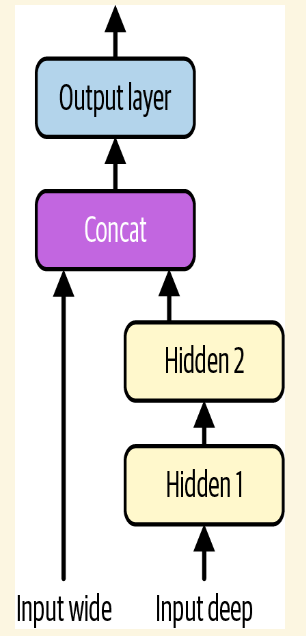

In [106]:
class WideAndDeepV3(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [107]:
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32, shuffle=True)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32, shuffle=True)

In [108]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch_wide, X_batch_deep, y_batch in train_loader:
      X_batch_wide, X_batch_deep, y_batch = X_batch_wide.to(device), X_batch_deep.to(device), y_batch.to(device)
      y_pred = model(X_batch_wide, X_batch_deep)
      loss = criterion(y_pred, y_batch)
      total_loss = total_loss + loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')


In [109]:
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader_wd, n_epochs)

Epoch 1/20, Loss:1.4489
Epoch 2/20, Loss:0.6250
Epoch 3/20, Loss:0.5748
Epoch 4/20, Loss:0.5470
Epoch 5/20, Loss:0.5260
Epoch 6/20, Loss:0.5121
Epoch 7/20, Loss:0.5031
Epoch 8/20, Loss:0.4994
Epoch 9/20, Loss:0.4879
Epoch 10/20, Loss:0.4806
Epoch 11/20, Loss:0.4742
Epoch 12/20, Loss:0.4706
Epoch 13/20, Loss:0.4651
Epoch 14/20, Loss:0.4616
Epoch 15/20, Loss:0.4575
Epoch 16/20, Loss:0.4545
Epoch 17/20, Loss:0.4526
Epoch 18/20, Loss:0.4498
Epoch 19/20, Loss:0.4467
Epoch 20/20, Loss:0.4443


In [110]:
class WideAndDeepDataset(torch.utils.data.Dataset):
  def __init__(self, X_wide, X_deep, y):
    self.X_wide = X_wide
    self.X_deep = X_deep
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
    return input_dict, self.y[idx]


In [111]:
train_data_named = WideAndDeepDataset(X_wide = X_train[:, :5], X_deep = X_train[:, 2:], y=y_train)
valid_data_named = WideAndDeepDataset(X_wide = X_valid[:, :5], X_deep = X_valid[:, 2:], y=y_valid)
test_data_named = WideAndDeepDataset(X_wide = X_test[:, :5], X_deep = X_test[:, 2:], y=y_test)

train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [112]:
import matplotlib.pyplot as plt

In [113]:
def train(model, optimizer, criterion, train_loader, n_epochs, plot_loss=False):
  losses = []
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      inputs = {name: X.to(device) for name, X in inputs.items()}
      y_batch = y_batch.to(device)
      y_pred = model(X_wide=inputs['X_wide'], X_deep=inputs['X_deep'])
      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

  if plot_loss:
    plt.figure(figsize=(8, 5))
    plt.title('Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(n_epochs),losses);



In [114]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [115]:
model = model.to(device)

Epoch 1/20, Loss: 0.521171510219574
Epoch 2/20, Loss: 0.1682487279176712
Epoch 3/20, Loss: 0.5813005566596985
Epoch 4/20, Loss: 0.4507964551448822
Epoch 5/20, Loss: 0.274934858083725
Epoch 6/20, Loss: 0.8603898286819458
Epoch 7/20, Loss: 0.8138270974159241
Epoch 8/20, Loss: 0.77456134557724
Epoch 9/20, Loss: 0.4940653145313263
Epoch 10/20, Loss: 0.4234084188938141
Epoch 11/20, Loss: 0.5954709053039551
Epoch 12/20, Loss: 0.29811832308769226
Epoch 13/20, Loss: 0.25754302740097046
Epoch 14/20, Loss: 0.1140945702791214
Epoch 15/20, Loss: 0.35288679599761963
Epoch 16/20, Loss: 0.2706155776977539
Epoch 17/20, Loss: 0.415007084608078
Epoch 18/20, Loss: 0.22092917561531067
Epoch 19/20, Loss: 0.08486814051866531
Epoch 20/20, Loss: 0.42983031272888184


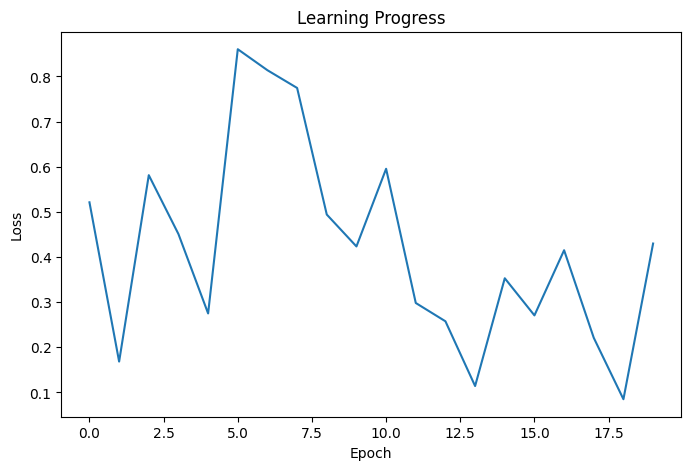

In [116]:
train(model, optimizer, mse, train_loader_named, 20, True)

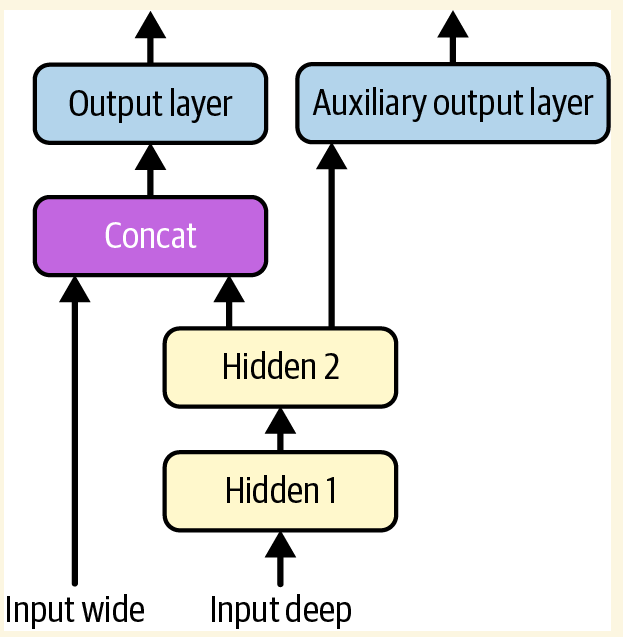

In [117]:
class WideAndDeepV4(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(6, 50), nn.ReLU(),
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)
    self.aux_output_layer = nn.Linear(40, 1)

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    concat = torch.concat([X_wide, deep_output], dim=1)
    main_output = self.output_layer(concat)
    aux_output = self.aux_output_layer(deep_output)

    return main_output, aux_output


In [118]:
model = WideAndDeepV4(n_features)

In [119]:
model

WideAndDeepV4(
  (deep_stack): Sequential(
    (0): Linear(in_features=6, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=45, out_features=1, bias=True)
  (aux_output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [120]:
!pip install torchviz graphviz


In [121]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      y_pred, y_pred_aux = model(**inputs)
      main_loss = criterion(y_pred, y_batch)
      aux_loss = criterion(y_pred_aux, y_batch)
      loss = 0.8 * main_loss + 0.2 * aux_loss

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

In [122]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [123]:
train(model, optimizer, mse, train_loader_named, 20)

Epoch 1/20, Loss: 0.6475944519042969
Epoch 2/20, Loss: 0.6036727428436279
Epoch 3/20, Loss: 0.4724913239479065
Epoch 4/20, Loss: 0.7082507610321045
Epoch 5/20, Loss: 0.4593815207481384
Epoch 6/20, Loss: 1.0379517078399658
Epoch 7/20, Loss: 0.7629125714302063
Epoch 8/20, Loss: 0.5295833349227905
Epoch 9/20, Loss: 0.5308524370193481
Epoch 10/20, Loss: 0.23900385200977325
Epoch 11/20, Loss: 0.5356257557868958
Epoch 12/20, Loss: 0.40203016996383667
Epoch 13/20, Loss: 0.4046645760536194
Epoch 14/20, Loss: 0.6555315256118774
Epoch 15/20, Loss: 0.5317491292953491
Epoch 16/20, Loss: 0.27180778980255127
Epoch 17/20, Loss: 0.20773273706436157
Epoch 18/20, Loss: 0.2918942868709564
Epoch 19/20, Loss: 0.38963401317596436
Epoch 20/20, Loss: 0.5739538669586182


In [124]:
X_wide_graph = [i for i in train_loader_named][:1][0][0]['X_wide']
X_deep_graph = [i for i in train_loader_named][:1][0][0]['X_deep']

In [125]:
import torch
from torchviz import make_dot
import torchvision.models as models

In [126]:
model.eval()

batch_size = 1
X_wide = torch.zeros(batch_size, 5)
X_deep = torch.zeros(batch_size, 6)

y_pred, y_aux = model(X_wide, X_deep)

dot = make_dot(
    (y_pred + y_aux).sum(),
    params=dict(model.named_parameters())
)

dot.format = "png"
dot.render("wide_and_deep_graph")


'wide_and_deep_graph.png'

# Let's do some VISION👁

In [127]:
import torchvision
import torchvision.transforms.v2 as T

In [128]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

In [129]:
train_and_valid_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=False, download=True, transform=toTensor)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.97MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.0MB/s]


In [130]:
torch.manual_seed(42)

In [131]:
train_data, valid_data = torch.utils.data.random_split(train_and_valid_data,
                                                       [55_000, 5_000])

In [132]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [133]:
X_sample, y_sample = train_data[0]

In [134]:
X_sample.shape

torch.Size([1, 28, 28])

In [135]:
X_sample.dtype

torch.float32

In [136]:
train_and_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [137]:
class ImageClassifier(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_inputs, n_hidden1),
        nn.ReLU(),
        nn.Linear(n_hidden1, n_hidden2),
        nn.ReLU(),
        nn.Linear(n_hidden2, n_classes),
    )

  def forward(self, X):
    return self.mlp(X)

In [138]:
torch.manual_seed(42)

In [139]:
model = ImageClassifier(n_inputs=28*28, n_hidden1=300, n_hidden2=100, n_classes=10)
model = model.to(device)
xentropy = nn.CrossEntropyLoss()

In [140]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch: {epoch+1}/{n_epochs}, Loss: {loss}')

In [141]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.002)

In [142]:
train(model, optimizer, xentropy, train_loader, 20)

Epoch: 1/20, Loss: 2.3152263164520264
Epoch: 2/20, Loss: 2.325509786605835
Epoch: 3/20, Loss: 2.322967529296875
Epoch: 4/20, Loss: 2.2849209308624268
Epoch: 5/20, Loss: 2.3055410385131836
Epoch: 6/20, Loss: 2.308236837387085
Epoch: 7/20, Loss: 2.325643539428711
Epoch: 8/20, Loss: 2.3125574588775635
Epoch: 9/20, Loss: 2.312513589859009
Epoch: 10/20, Loss: 2.29607892036438
Epoch: 11/20, Loss: 2.3331143856048584
Epoch: 12/20, Loss: 2.310720443725586
Epoch: 13/20, Loss: 2.3027515411376953
Epoch: 14/20, Loss: 2.3049120903015137
Epoch: 15/20, Loss: 2.324148654937744
Epoch: 16/20, Loss: 2.3035333156585693
Epoch: 17/20, Loss: 2.3219282627105713
Epoch: 18/20, Loss: 2.327850341796875
Epoch: 19/20, Loss: 2.3069262504577637
Epoch: 20/20, Loss: 2.3225433826446533


In [158]:
accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device)

In [143]:
model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [144]:
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)

with torch.no_grad():
  y_pred_logits = model(X_new)

y_pred = y_pred_logits.argmax(dim=1)
y_pred

tensor([5, 5, 5], device='cuda:0')

In [145]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sandal', 'Sandal', 'Sandal']

In [147]:
X_new.shape

torch.Size([3, 1, 28, 28])

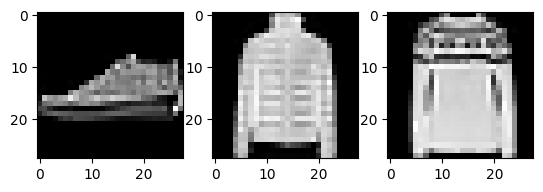

In [151]:
for i in range(X_new.shape[0]):
  plt.subplot(1, 3, i +1)
  plt.imshow(X_new[i, 0, :, :].cpu().numpy(), cmap='gray')

In [152]:
import torch.nn.functional as F

In [153]:
y_proba = F.softmax(y_pred_logits, dim=1)
y_proba.round(decimals=3)

tensor([[0.1040, 0.1010, 0.0960, 0.0950, 0.1010, 0.1060, 0.1010, 0.0930, 0.0990,
         0.1030],
        [0.1020, 0.1000, 0.0990, 0.0970, 0.0930, 0.1150, 0.1000, 0.0960, 0.1000,
         0.0970],
        [0.1010, 0.1040, 0.0990, 0.0920, 0.0940, 0.1160, 0.0970, 0.0970, 0.1010,
         0.0990]], device='cuda:0')

In [154]:
y_top4_logits, y_top4_indices = torch.topk(y_pred_logits, 4, dim=1)
y_top4_probas = F.softmax(y_top4_logits, dim=1)
y_top4_probas.round(decimals=3)

tensor([[0.2550, 0.2510, 0.2490, 0.2440],
        [0.2750, 0.2450, 0.2400, 0.2400],
        [0.2740, 0.2470, 0.2400, 0.2390]], device='cuda:0')

In [155]:
y_top4_indices

tensor([[5, 0, 9, 1],
        [5, 0, 1, 6],
        [5, 1, 0, 8]], device='cuda:0')

# Optimizing Models

In [161]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 12.2 MB/s eta 0:00:00


In [162]:
import optuna

In [165]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

In [166]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [ ]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2026-02-07 14:59:04,463] A new study created in memory with name: no-name-899b80aa-c3a8-41be-926c-fcc0f97f2aa9


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424


[I 2026-02-07 15:01:46,109] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.7992
Epoch 3/10, train loss: 0.5203, train metric: 0.8169, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4557, train metric: 0.8404, valid metric: 0.8352
Epoch 6/10, train loss: 0.4387, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8408
Epoch 8/10, train loss: 0.4123, train metric: 0.8566, valid metric: 0.8514
Epoch 9/10, train loss: 0.3998, train metric: 0.8601, valid metric: 0.8532


[I 2026-02-07 15:04:20,103] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3897, train metric: 0.8638, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898


In [ ]:
study.best_params

In [ ]:
study.best_value

In [ ]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

In [ ]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [ ]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [ ]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

In [ ]:
study.best_value

In [ ]:
study.best_params

In [ ]:
torch.save(model, "my_fashion_mnist.pt")


In [ ]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)
loaded_model.eval()


In [ ]:
y_pred_logits = loaded_model(X_new)


In [ ]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")


In [ ]:
type(model.state_dict())

In [ ]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

In [ ]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [ ]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()